## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
import re

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading Train and Test data file

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
test.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1480 non-null   object 
 1   availability  1480 non-null   object 
 2   location      1480 non-null   object 
 3   size          1478 non-null   object 
 4   society       854 non-null    object 
 5   total_sqft    1480 non-null   object 
 6   bath          1473 non-null   float64
 7   balcony       1411 non-null   float64
 8   price         0 non-null      float64
dtypes: float64(3), object(6)
memory usage: 104.2+ KB


In [8]:
train.nunique()  

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [9]:
test.nunique()

area_type         4
availability     51
location        495
size             21
society         594
total_sqft      666
bath             11
balcony           4
price             0
dtype: int64

In [10]:
train.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [11]:
test.isnull().sum()

area_type          0
availability       0
location           0
size               2
society          626
total_sqft         0
bath               7
balcony           69
price           1480
dtype: int64

In [13]:
train[train['location'].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [15]:
train[train['society']=='Grare S']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0
12238,Carpet Area,Ready To Move,Anantapura,3 BHK,Grare S,1600,3.0,2.0,77.0


In [16]:
train['location'].fillna('Anantapura',inplace=True)

In [17]:
train[train['society']=='Grare S']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,Anantapura,3 BHK,Grare S,1600,3.0,2.0,86.0
12238,Carpet Area,Ready To Move,Anantapura,3 BHK,Grare S,1600,3.0,2.0,77.0


In [18]:
import re

train['size'] = train[train['size'].isna()==False]['size'].str.extract('(\d)')
test['size'] = test[test['size'].isna()==False]['size'].str.extract('(\d)')

In [19]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200,2.0,1.0,51.00


In [20]:
test.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2,AmageSa,1161,2.0,1.0,NaN


In [21]:
def sqft(sq):
    j=sq.split('-')
    if len(j)==1:
        j.insert(0,'0')
    j[1] = re.findall('\d+',j[1])
    return j
train['total_sqft']=train['total_sqft'].apply(sqft)
test['total_sqft']=test['total_sqft'].apply(sqft)

In [24]:
train['min_sqft'] = train['total_sqft'].apply(lambda x : float(x[0]))
train['max_sqft'] = train['total_sqft'].apply(lambda x : float(x[1][0]))

test['min_sqft'] = test['total_sqft'].apply(lambda x : float(x[0]))
test['max_sqft'] = test['total_sqft'].apply(lambda x : float(x[1][0]))

In [27]:
train.drop('total_sqft',axis=1,inplace=True)
test.drop('total_sqft',axis=1,inplace=True)

In [30]:
a=(train['min_sqft']+train['max_sqft'])/2
b=(test['min_sqft']+test['max_sqft'])/2

0        612.5
1       1200.0
2        825.0
3        661.0
4        580.5
         ...  
1475     623.0
1476     830.0
1477     608.0
1478     498.0
1479     575.0
Length: 1480, dtype: float64

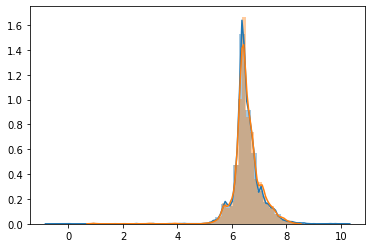

In [37]:
sns.distplot(np.log(a))
sns.distplot(np.log(b))

In [38]:
train['mean_sqft'] = np.log(a)
test['mean_sqft'] = np.log(b)

In [39]:
def fill_size(data):
    size = data[0]
    sqft = data[1]
    
    if pd.isnull(size):
        if sqft<640:
            return '2'
        elif sqft>640 and sqft<845:
            return '3'
        else:
            return '4'
    else:
        return size

In [40]:
train['size'] = train[['size','mean_sqft']].apply(fill_size, axis=1)
test['size'] = test[['size','mean_sqft']].apply(fill_size, axis=1)

In [42]:
def fill_bath(data):
    bath = data[0]
    sqft = data[1]
    
    if pd.isnull(bath):
        if sqft<640:
            return 2.0
        elif sqft>640 and sqft<845:
            return 3.0
        else:
            return 4.0
    else:
        return bath

In [43]:
train['bath'] = train[['bath','mean_sqft']].apply(fill_bath, axis=1)
test['bath'] = test[['bath','mean_sqft']].apply(fill_bath, axis=1)

In [44]:
def fill_balcony(data):
    bal=data[0]
    sqft=data[1]
    if pd.isnull(bal):
        if sqft<792:
            return 1.0
        else:
            return 2.0
    else:
        return bal

In [45]:
train['balcony'] = train[['balcony','mean_sqft']].apply(fill_balcony, axis=1)
test['balcony'] = test[['balcony','mean_sqft']].apply(fill_balcony, axis=1)

In [46]:
train['availability'] = train['availability'].apply(lambda x: "".join(re.findall("[a-zA-Z]+", x)))
test['availability'] = test['availability'].apply(lambda x: "".join(re.findall("[a-zA-Z]+", x)))

In [47]:
train.head()

,area_type,availability,location,size,society,bath,balcony,price,min_sqft,max_sqft,mean_sqft
0,Super built-up Area,Dec,Electronic City Phase II,2,Coomee,2.0,1.0,39.07,0.0,1056.0,6.269096
1,Plot Area,ReadyToMove,Chikka Tirupathi,4,Theanmp,5.0,3.0,120.00,0.0,2600.0,7.170120
2,Built-up Area,ReadyToMove,Uttarahalli,3,NaN,2.0,3.0,62.00,0.0,1440.0,6.579251
3,Super built-up Area,ReadyToMove,Lingadheeranahalli,3,Soiewre,3.0,1.0,95.00,0.0,1521.0,6.633976
4,Super built-up Area,ReadyToMove,Kothanur,2,NaN,2.0,1.0,51.00,0.0,1200.0,6.396930


In [48]:
test.head()

,area_type,availability,location,size,society,bath,balcony,price,min_sqft,max_sqft,mean_sqft
0,Super built-up Area,ReadyToMove,Brookefield,2,Roeekbl,2.0,2.0,NaN,0.0,1225.0,6.417549
1,Plot Area,ReadyToMove,Akshaya Nagar,9,NaN,9.0,2.0,NaN,0.0,2400.0,7.090077
2,Plot Area,Apr,Hennur Road,4,Saandtt,5.0,2.0,NaN,0.0,1650.0,6.715383
3,Super built-up Area,ReadyToMove,Kodichikkanahalli,3,Winerri,3.0,1.0,NaN,0.0,1322.0,6.493754
4,Super built-up Area,ReadyToMove,Konanakunte,2,AmageSa,2.0,1.0,NaN,0.0,1161.0,6.363890


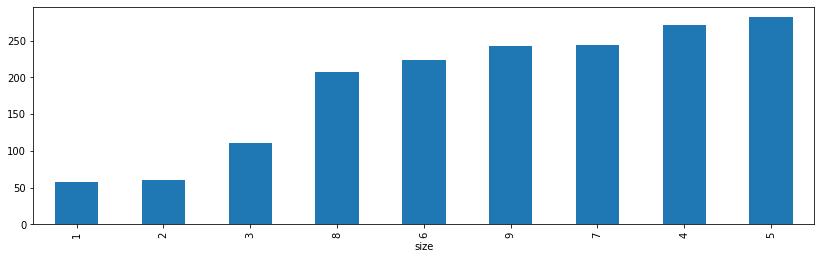

In [49]:
train.groupby(['size'])['price'].mean().\
sort_values().\
plot(kind='bar',figsize=(14,4))

In [50]:
train['balcony'] = train['balcony'].apply(lambda x: str(x))
train['bath'] = train['bath'].apply(lambda x: str(x))

test['balcony'] = test['balcony'].apply(lambda x: str(x))
test['bath'] = test['bath'].apply(lambda x: str(x))

In [51]:
X_train = train.drop(['society','price'],axis=1)
y_train = train['price']

X_test = test.drop(['society','price'],axis=1)

In [52]:
X_train.head()

,area_type,availability,location,size,bath,balcony,min_sqft,max_sqft,mean_sqft
0,Super built-up Area,Dec,Electronic City Phase II,2,2.0,1.0,0.0,1056.0,6.269096
1,Plot Area,ReadyToMove,Chikka Tirupathi,4,5.0,3.0,0.0,2600.0,7.170120
2,Built-up Area,ReadyToMove,Uttarahalli,3,2.0,3.0,0.0,1440.0,6.579251
3,Super built-up Area,ReadyToMove,Lingadheeranahalli,3,3.0,1.0,0.0,1521.0,6.633976
4,Super built-up Area,ReadyToMove,Kothanur,2,2.0,1.0,0.0,1200.0,6.396930


In [53]:
X_test.head()

,area_type,availability,location,size,bath,balcony,min_sqft,max_sqft,mean_sqft
0,Super built-up Area,ReadyToMove,Brookefield,2,2.0,2.0,0.0,1225.0,6.417549
1,Plot Area,ReadyToMove,Akshaya Nagar,9,9.0,2.0,0.0,2400.0,7.090077
2,Plot Area,Apr,Hennur Road,4,5.0,2.0,0.0,1650.0,6.715383
3,Super built-up Area,ReadyToMove,Kodichikkanahalli,3,3.0,1.0,0.0,1322.0,6.493754
4,Super built-up Area,ReadyToMove,Konanakunte,2,2.0,1.0,0.0,1161.0,6.363890


In [54]:
X_train_cat = X_train.select_dtypes(exclude=[np.number])
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_cat = X_test.select_dtypes(exclude=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

In [59]:
oh = OneHotEncoder(handle_unknown='ignore')
X_train_oh = oh.fit_transform(X_train_cat).toarray()
X_test_oh = oh.transform(X_test_cat).toarray()

In [60]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_numeric)
X_test_sc = sc.transform(X_test_numeric)

In [61]:
X_train_final = np.hstack((X_train_oh,X_train_sc))
X_test_final = np.hstack((X_test_oh,X_test_sc))

In [62]:
knnmodel = KNeighborsRegressor(n_neighbors=20)
knnmodel.fit(X_train_final,y_train)
print('training score:',knnmodel.score(X_train_final,y_train))
# print('test score:',knnmodel.score(X_test_final,y_test))

training score: 0.6167387691693063


In [63]:
pred_knn = knnmodel.predict(X_test_final)

In [64]:
np.savetxt('predict_text.csv',pred_knn, delimiter=' ', newline='\n', header='Price', footer='', comments='# ', encoding=None)

In [ ]:
X_test